In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

macrodata = sm.datasets.macrodata.load_pandas().data
macrodata.index = pd.period_range('1959Q1', '2009Q3', freq='Q')


<AxesSubplot: >

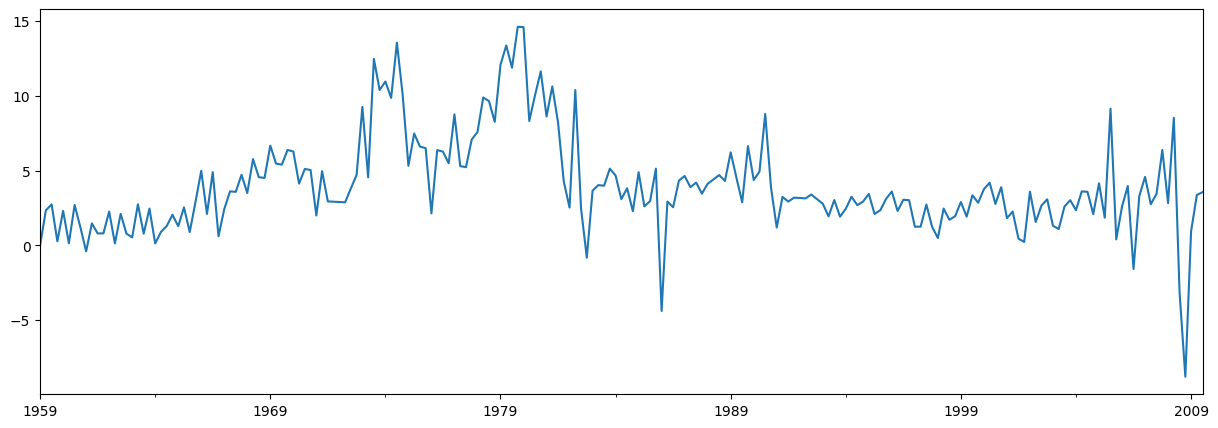

In [4]:
endog = macrodata['infl']
endog.plot(figsize = (15, 5))

In [20]:
# Construct the model
mod = sm.tsa.SARIMAX(endog, order=(2, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                   infl   No. Observations:                  203
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -462.419
Date:                Sat, 01 Jun 2024   AIC                            932.839
Time:                        20:11:47   BIC                            946.092
Sample:                    03-31-1959   HQIC                           938.200
                         - 09-30-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9574      0.278      3.443      0.001       0.412       1.502
ar.L1          0.4433      0.038     11.634      0.000       0.369       0.518
ar.L2          0.3103      0.041      7.517      0.0

<AxesSubplot: >

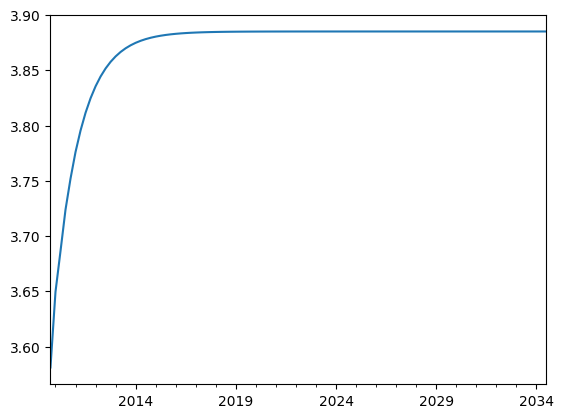

In [22]:
forecasts_results = res.forecast(100)
forecasts_results.plot()

In [15]:
dir(forecasts_results)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__redu

TypeError: float() argument must be a string or a real number, not 'Period'

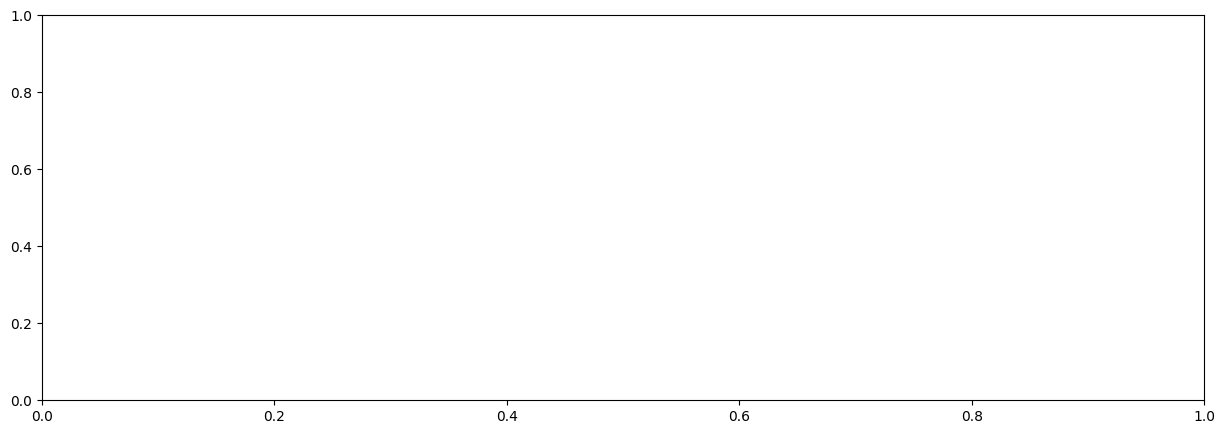

In [10]:

plt.figure(figsize = (15, 5))
plt.plot(forecasts_results)
plt.show()

In [8]:
endog.tail()

2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64